# NetworkX
Here we will try to use Network-X library in order to manipulate data. 

Link for docs: [link](https://networkx.org/documentation/stable/reference/introduction.html)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from ogb.nodeproppred import NodePropPredDataset

In [2]:
dataset = NodePropPredDataset(name='ogbn-arxiv')
dataset[0][0]['edge_index']

array([[104447,  15858, 107156, ...,  45118,  45118,  45118],
       [ 13091,  47283,  69161, ..., 162473, 162537,  72717]])

In [3]:
# Get graph data
graph = dataset[0][0]
edge_index = graph['edge_index']  # edge index

In [4]:
edge_index

array([[104447,  15858, 107156, ...,  45118,  45118,  45118],
       [ 13091,  47283,  69161, ..., 162473, 162537,  72717]])

# Whole Dataset

In [5]:
# Create a new directed graph
G = nx.DiGraph()

# Add edges to the graph
for i in range(edge_index.shape[1]):
    source = edge_index[0][i]
    target = edge_index[1][i]
    G.add_edge(source, target)

# Print some basic graph statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Export the whole graph to a graphml file
nx.write_graphml(G, "graph.graphml")

Number of nodes: 169343
Number of edges: 1166243


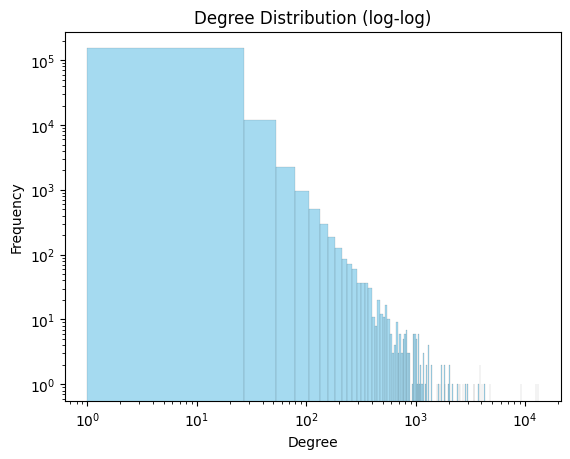

In [6]:
degrees = dict(G.degree())

# Plot degree distribution using Seaborn and Matplotlib
degree_values = list(degrees.values())
sns.histplot(degree_values, bins=500, color='skyblue', edgecolor='black', kde=False)
plt.title("Degree Distribution (log-log)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

## Page Rank


In [7]:
# Run PageRank algorithm
pagerank_scores = nx.pagerank(G)

# Sort nodes by PageRank score
sorted_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 most important nodes by PageRank score
print("Top 10 most important nodes by PageRank score:")
for node, score in sorted_nodes[:10]:
    print("Node:", node, "Score:", score)

Top 10 most important nodes by PageRank score:
Node: 88803 Score: 0.009313955776206584
Node: 159030 Score: 0.008238023064001284
Node: 125272 Score: 0.006537166149752257
Node: 14201 Score: 0.0052396762897864955
Node: 1353 Score: 0.004132857989385874
Node: 46132 Score: 0.004070703672485428
Node: 25208 Score: 0.0040530148848254375
Node: 22502 Score: 0.003861298246198355
Node: 22035 Score: 0.003344818968725123
Node: 98786 Score: 0.003088615645026952


This has the most important nodes (after runing the Page Rank algorithm ) and took all of their neighbors and tried to plot the possible connections it may have with each other.

In [15]:
# Extract the 10 most important nodes and their neighbors
most_important_nodes = [node for node, score in sorted_nodes[:10]]
important_neighbors = []
for node in most_important_nodes:
    important_neighbors.extend(list(G.neighbors(node)))

# Create a subgraph consisting of the most important nodes and their neighbors
subgraph_nodes = set(most_important_nodes + important_neighbors)
subgraph = G.subgraph(subgraph_nodes)

# # Add all possible edges between nodes in the subgraph
# for source in subgraph_nodes:
#     for target in subgraph_nodes:
#         if source != target and not subgraph.has_edge(source, target):
#             subgraph.add_edge(source, target)


In [16]:
subgraph.number_of_edges()

160

In [17]:
subgraph.number_of_nodes()

45

In [24]:
most_important_nodes

[88803, 159030, 125272, 14201, 1353, 46132, 25208, 22502, 22035, 98786]

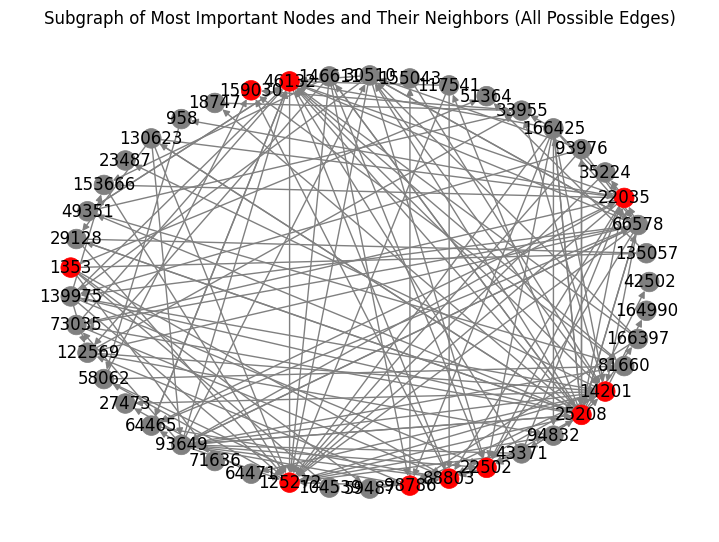

In [29]:
# Colour the most important nodes
most_important_nodes
node_colours = {node_index : "red" for node_index in most_important_nodes}

# Plot the subgraph
plt.figure(figsize=(7, 5))
# pos = nx.spring_layout(subgraph)
nx.draw_circular(subgraph, with_labels=True, node_color=[node_colours.get(node, 'gray') for node in subgraph.nodes()], node_size=200, edge_color='gray', linewidths=0.5)
plt.title('Subgraph of Most Important Nodes and Their Neighbors (All Possible Edges)')
plt.show()

# Betweeness

In [30]:
# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Get nodes with highest betweenness centrality
highest_betweenness_nodes = sorted(betweenness, key=betweenness.get, reverse=True)

# Print nodes with highest betweenness centrality
print("Nodes with highest betweenness centrality:")
for node in highest_betweenness_nodes[:5]:  # Print top 5 nodes
    print("Node:", node, "Betweenness Centrality:", betweenness[node])

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1037f6f90>>
Traceback (most recent call last):
  File "/Users/pavlospoulos/miniconda3/envs/socialNet/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1037f6f90>>
Traceback (most recent call last):
  File "/Users/pavlospoulos/miniconda3/envs/socialNet/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


## Betweeness on Top 5% percentile

In [ ]:
# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Choose the top X nodes based on percentile
percentile_threshold = 95  # Choose the top 5%
centrality_threshold = np.percentile(list(betweenness.values()), percentile_threshold)

# Select nodes that exceed the percentile threshold
top_nodes = [node for node, centrality in betweenness.items() if centrality >= centrality_threshold]

# Print selected nodes
print("Top nodes based on percentile threshold ({}%):".format(percentile_threshold))
for node in top_nodes:
    print("Node:", node, "Betweenness Centrality:", betweenness[node])

## Shortest Paths

We need the strongly connected components in order to view this

In [84]:
# Extract the largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G), key=len)

In [85]:
# Create a subgraph of the largest strongly connected component
scc_subgraph = G.subgraph(largest_scc)

In [87]:
scc_subgraph.number_of_nodes()

23164

In [88]:
scc_subgraph.number_of_edges()

223310

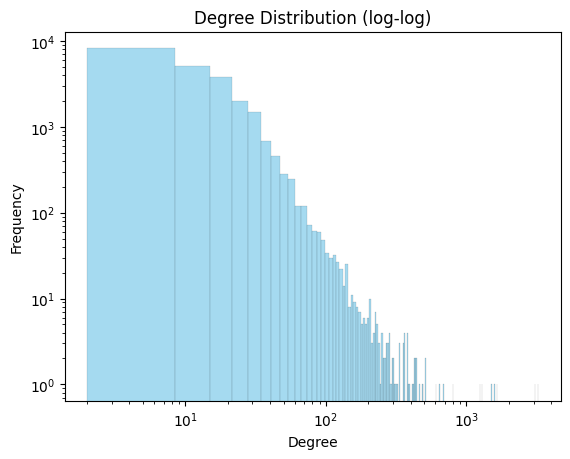

In [91]:
degrees = dict(scc_subgraph.degree())

# Plot degree distribution using Seaborn and Matplotlib
degree_values = list(degrees.values())
sns.histplot(degree_values, bins=500, color='skyblue', edgecolor='black', kde=False)
plt.title("Degree Distribution (log-log)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Page Rank on Strong Component

In [92]:
# Page Rank on this subgraph
# Run PageRank algorithm
pagerank_scores = nx.pagerank(scc_subgraph)

# Sort nodes by PageRank score
sorted_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 most important nodes by PageRank score
print("Top 10 most important nodes by PageRank score:")
for node, score in sorted_nodes[:10]:
    print("Node:", node, "Score:", score)

Top 10 most important nodes by PageRank score:
Node: 22035 Score: 0.024679969400842456
Node: 25208 Score: 0.02355293582007723
Node: 958 Score: 0.02178997082411319
Node: 123922 Score: 0.021041008977140268
Node: 93649 Score: 0.018520805013598582
Node: 66578 Score: 0.017874971316379752
Node: 30510 Score: 0.01676732620660468
Node: 125360 Score: 0.01654916236043426
Node: 166459 Score: 0.01568091173235445
Node: 79075 Score: 0.010302936932091403


In [93]:
# Extract the most important nodes and their neighbors
most_important_nodes = [node for node, score in sorted_nodes]
important_neighbors = []
for node in most_important_nodes:
    important_neighbors.extend(list(G.neighbors(node)))

# Create a subgraph consisting of the most important nodes and their neighbors
subgraph_nodes = set(most_important_nodes + important_neighbors)
scc_subgraph_neighbours = G.subgraph(subgraph_nodes)

In [94]:
scc_subgraph_neighbours.number_of_nodes()

32843

In [95]:
nx.draw(scc_subgraph_neighbours)

Error in callback <function flush_figures at 0x32229d440> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### Average Shortest Path on Strong Component

In [ ]:
# Calculate the average shortest path length within the largest strongly connected component
average_shortest_path_length = nx.average_shortest_path_length(scc_subgraph)

print("Average shortest path length within the largest strongly connected component:", average_shortest_path_length)

# Something else

In [63]:
# Calculate the degree of each node
degrees = dict(G.degree())

# Compute the mean degree of the graph
mean_degree = sum(degrees.values()) / len(degrees)

print("Mean degree of the graph:", mean_degree)

# Get nodes with degree greater than the mean degree
nodes_above_mean = [node for node, degree in degrees.items() if degree > mean_degree]

print("Nodes with degree greater than the mean degree:", nodes_above_mean)

G_in_degree_more_than_avg = G.subgraph(nodes_above_mean)
G_in_degree_more_than_avg.number_of_nodes()

# Export the subgraph to a graphml file
nx.write_graphml(G_in_degree_more_than_avg, "subgraph_more_than_avg.graphml")

Mean degree of the graph: 13.77373732601879
Nodes with degree greater than the mean degree: [47283, 69161, 136440, 107366, 158460, 90124, 121740, 122427, 161023, 84342, 35436, 21375, 90249, 150492, 26107, 148059, 49187, 81746, 52854, 153223, 134600, 73960, 44773, 16921, 49267, 88828, 51904, 76403, 131082, 24696, 20726, 154492, 6447, 143121, 52615, 4907, 156982, 158981, 0, 93487, 52893, 48850, 138493, 133238, 27473, 106910, 116610, 15542, 125, 42653, 158578, 105441, 157018, 121208, 77842, 152997, 108113, 109961, 18764, 134699, 71685, 121244, 157181, 18286, 15378, 105291, 72575, 167517, 88252, 163659, 96349, 14616, 4096, 7225, 51292, 138659, 82079, 120351, 2644, 111209, 87455, 69141, 96751, 129783, 147122, 88881, 88895, 7381, 15613, 62345, 166777, 31855, 42564, 79586, 25267, 121207, 42168, 74496, 71198, 24046, 9266, 29900, 72486, 31301, 43406, 75344, 124352, 12561, 26066, 117547, 107337, 63378, 115159, 59821, 27902, 77047, 63844, 95477, 149854, 41380, 148333, 7857, 96110, 13919, 134514, 

In [64]:
G_in_degree_more_than_avg.adjacency()

<generator object ItemsView.__iter__ at 0x33968a190>